In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

In [197]:
def Phi(phi, M):
    Phi = []
    for m in range(M):
        Phi.append((1/np.sqrt(2*np.pi)) * np.exp(1j * m * phi))
    return Phi

def N_n(n, m, a):
    k = 1+n+m
    return a**2 / 2 * jv(m+1, k*a)**2
    
def R(r, M, N, a):
    R = []
    for n in range(1,N+1):
        ns = []
        for m in range(M+1):
            k = 1+n+m
            ns.append(1 / np.sqrt(N_n(n,m,a)) * jv(m, k*r))
        R.append(ns)
    return R

In [207]:
M = 4
N = 4
a=1

phis = np.linspace(0,2*np.pi, 360)
radii = np.linspace(0,a,100)

phi_basis = []
for phi in phis:
    phi_basis.append(Phi(phi, M))

radii_basis = []
for r in radii:
    radii_basis.append(R(r, M, N, a))

phi_basis = np.array(phi_basis)
radii_basis = np.array(radii_basis)

In [168]:
coeffs = np.random.uniform(-10,10,size=(M+1, 1))
f = basis @ coeffs

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phis, f.real, label='real')
ax.plot(phis, f.imag, label='imag')
ax.grid(True)
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 3)

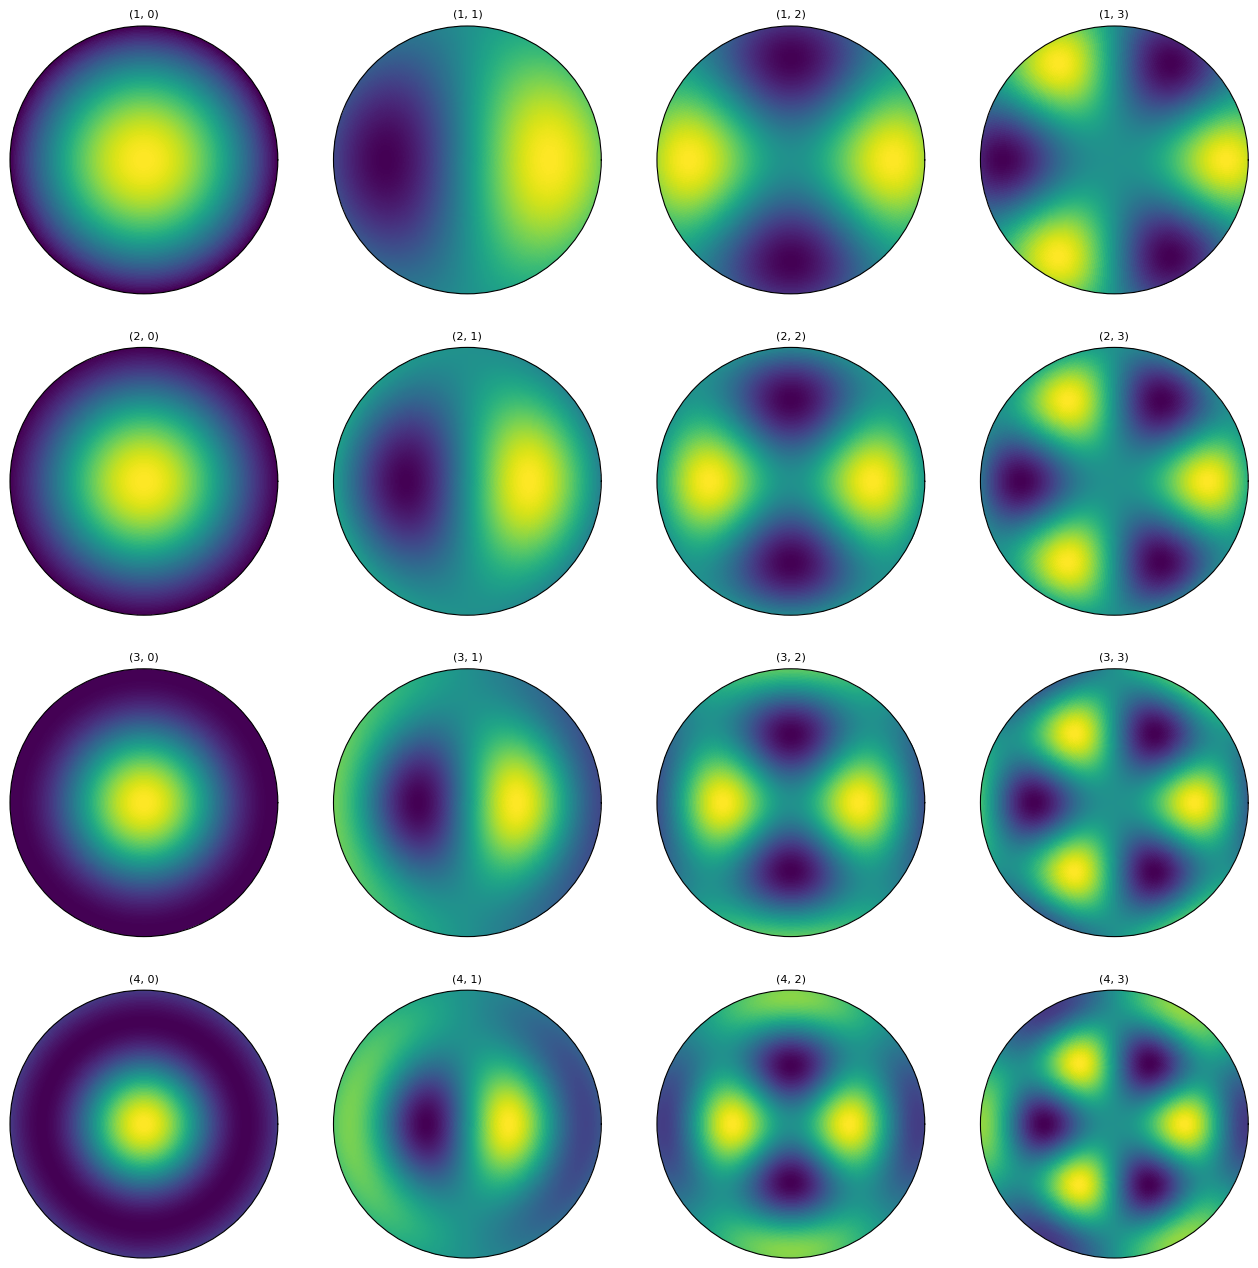

In [209]:
fig, ax = plt.subplots(ncols=M, nrows=N, subplot_kw={'projection': 'polar'}, figsize=(16,16))
for n in range(N):
    for m in range(M):
        psi = radii_basis[:,n,m].reshape(100,1) @ phi_basis[:,m].reshape(1,360)
        
        ax[n][m].pcolormesh(phis,radii,psi.real)
        ax[n][m].grid(False)
        ax[n][m].set_yticklabels([])
        ax[n][m].set_xticklabels([])
        ax[n][m].set_title(f"({n+1}, {m})", fontsize=8)
plt.show()